# Summary


**GOAL**:Scrape reddit posts to see which common stock is the hottest based on term frequency. Pages visited is /wallstreetbets with 1.1million subcribed users. Will be scraping hottest post and top post through all the comments. Desired number of post can be changed

**Conclusion**: Currently the hottest stock is GME as of Feb 15 2021

**Improvements** Some stopper words ('a'), slangs('CEO'), or mispelled words may be misinterpreted as tickers. Vader model can be improved with more updated version of words of today's standards



In the following you will see an example the number of times (freq) a ticker was said for 

**2 post on Feb 14 2021 and it's final (average) sentiment**

***In conclusion: We can see that GME was mentioned the most
However it has a less positive sentiment versus PLTR with 72% more.***

![picture](https://drive.google.com/uc?export=view&id=1Z2p4MTDt4AS0yE5aX3hWi5DI_5KVgBIv)

**Here is another example with 4 post on that day**

"this is your post:What a lovely day!

this is your post:Happy Valentines Day

this is your post:Can anyone guess when I discovered options trading?

this is your post:Soon may the tendie man cone"

***We can see that although GME was mentioned the most - it does not mean it has the highest rating positive sentiment. And a lower freq does not mean a better final sentiment (like TLSA vs APPL)***

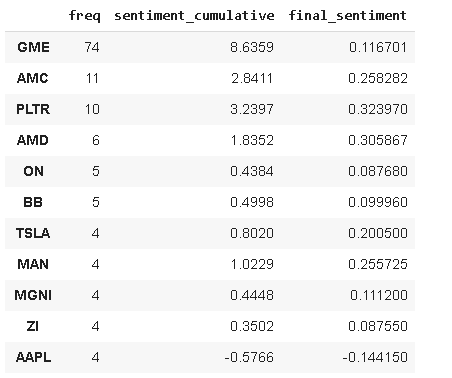


# *Install dependency*

In [ ]:
!pip install praw

# *Import praw*

In [ ]:
import praw
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import pprint
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

# *Open source follow below link to get your client id,secret key,user_agent*
1.   visit https://gilberttanner.com/blog/scraping-redditdata 

2.   get your client id,client secret,user_agent and back to below code.

In [ ]:
reddit = praw.Reddit(client_id='G_iHfGndqC3Nyw', client_secret='PgocTUf1AZQf9-N1q1uwByHxC1CSrg', user_agent='benchen',check_for_async=False)

#  *Goes into desired subreddit post and extract comments*



In [ ]:
#documention for API: https://praw.readthedocs.io/en/latest/tutorials/comments.html

hot_post_comments = []                                        #This posts extracts the replies and "more comments"
hot_posts = reddit.subreddit('wallstreetbets').hot(limit=5)   #You decide which subreddit

#First forloop - to go through the posts
  #not sticked (so ignore the pinned by moderator)
  #.replace_more : expand reply comment
#Second loop go through comments
for post in hot_posts:
  if not post.stickied:
    print("this is your post:" +str(post.title))
    post.comments.replace_more(limit=None)

    for comment in post.comments.list():
      # if hasattr(comment, "body"):
        hot_post_comments.append(comment.body)

this is your post:What a lovely day!
this is your post:Happy Valentines Day
this is your post:Can anyone guess when I discovered options trading?
this is your post:Soon may the tendie man cone


In [ ]:
#Verify length
len(hot_post_comments)

2801

In [ ]:
hot_post_comments

# *Make list of ticker*

In [ ]:
#list of tickers
#you have to download all 3: NYSE, NASDAQ, AMEX and merge all the ticker symbol
#this was done manually through excel (for ease of sake)
# https://www.nasdaq.com/market-activity/stocks/screener?exchange=NASDAQ&render=download
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))
type(filename)

Saving nasdaq_screener final version - nasdaq_screener_1611638403833 (1).csv to nasdaq_screener final version - nasdaq_screener_1611638403833 (1) (1).csv


str

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded[filename]))

In [ ]:
df2['Symbol']

0        AACG
1        AACQ
2       AACQU
3       AACQW
4         AAL
        ...  
7243      ZTO
7244      ZTR
7245      ZTS
7246      ZUO
7247     ZYME
Name: Symbol, Length: 7248, dtype: object

In [ ]:
products_list = df2['Symbol'].values.tolist()
print(products_list)

['AACG', 'AACQ', 'AACQU', 'AACQW', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXN', 'ABCB', 'ABCL', 'ABCM', 'ABEO', 'ABIO', 'ABMD', 'ABNB', 'ABST', 'ABTX', 'ABUS', 'ACAC', 'ACACU', 'ACACW', 'ACAD', 'ACBI', 'ACCD', 'ACER', 'ACET', 'ACEV', 'ACEVU', 'ACEVW', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACKIU', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACST', 'ACTC', 'ACTCU', 'ACTCW', 'ACTG', 'ADAP', 'ADBE', 'ADERU', 'ADES', 'ADI', 'ADIL', 'ADILW', 'ADMA', 'ADMP', 'ADMS', 'ADOC', 'ADOCR', 'ADOCW', 'ADP', 'ADPT', 'ADSK', 'ADTN', 'ADTX', 'ADUS', 'ADV', 'ADVM', 'ADVWW', 'ADXN', 'ADXS', 'AEACU', 'AEGN', 'AEHL', 'AEHR', 'AEIS', 'AEMD', 'AEP', 'AEPPL', 'AEPPZ', 'AERI', 'AESE', 'AEY', 'AEYE', 'AEZS', 'AFBI', 'AFIB', 'AFIN', 'AFINO', 'AFINP', 'AFMD', 'AFRM', 'AFYA', 'AGBA', 'AGBAR', 'AGBAU', 'AGBAW', 'AGC', 'AGCUU', 'AGCWW', 'AGEN', 'AGFS', 'AGFY', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCM', 'AGNCN', 'AGNCO', 'AGNCP', 'AGRX', 'AGTC', 'AGYS', 'AHAC', 'AHACU', 'AHACW'

In [ ]:
#Removing stopwords and some common slangs

from nltk.corpus import stopwords
nltk.download('stopwords')

remove_alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','','Y','Z', "YOLO", "TOS", "CEO", "CFO", "CTO", "DD", "BTFD", "WSB", "OK", "RH",
      "KYS", "FD", "TYS", "US", "USA", "IT", "ATH", "RIP", "BMW", "GDP",
      "OTM", "ATM", "ITM", "IMO", "LOL", "DOJ", "BE", "PR", "PC", "ICE",
      "TYS", "ISIS", "PRAY", "PT", "FBI", "SEC", "GOD", "NOT", "POS", "COD",
      "AYYMD", "FOMO", "TL;DR", "EDIT", "STILL", "LGMA", "WTF", "RAW", "PM",
      "LMAO", "LMFAO", "ROFL", "EZ", "RED", "BEZOS", "TICK", "IS", "DOW"
      "AM", "PM", "LPT", "GOAT", "FL", "CA", "IL", "PDFUA", "MACD", "HQ",
      "OP", "DJIA", "PS", "AH", "TL", "DR", "JAN", "FEB", "JUL", "AUG",
      "SEP", "SEPT", "OCT", "NOV", "DEC", "FDA", "IV", "ER", "IPO", "RISE"
      "IPA", "URL", "MILF", "BUT", "SSN", "FIFA", "USD", "CPU", "AT",'TH',
      "GG", "ELON", 'HE']

for i in remove_alphabet:
  if i in products_list:
    products_list.remove(i)

# for i in stopwords.words('english'):
#   if i in products_list:
#     products_list.remove(i)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# tickers={k: 0 for v, k in enumerate(products_list)}
# print(tickers)

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# *Creates sorted list of most used ticker*

In [ ]:
#counter_list counts the number of times the word has been said (counted_word) per comment
# NOTE: COUNTS ONE TIME EVEN THOUGH THE WORD APPEARS TWICE>IN THE SAME COMMENT

#Goes through hot post comments
# i being the comment
#Tokenize the comment
#Looks at each word said in the comment and count how many was said: example: I I am free ; "I" count will be 2, am is 1, free is 1

sentiment_per_mention =[]
counter_lst =[]
vader = SentimentIntensityAnalyzer()

for comment in hot_post_comments:
  sentiment=vader.polarity_scores(comment)['compound']
  sentiment_per_mention.append(sentiment)
  token=nltk.word_tokenize(comment)
  for ticker in products_list:
    if ticker in token: 
      counter_lst.append(ticker)

#Creates a dataframe of each comment said the ticker + the sentiment of the comment
df = pd.DataFrame(counter_lst,columns=['tickers'])
df['sentiment'] = pd.DataFrame(sentiment_per_mention)


In [ ]:
#Creates two dictionary - number of times the word is said and the number of the cumulative sentiment
wordfreq = {}
wordsentiment = {}
counter = 0
for word in df['tickers']:
    if word not in wordfreq:
        wordfreq[word] = 0 
        wordsentiment[word] = 0 
    wordsentiment[word] += df['sentiment'][counter]
    wordfreq[word] +=1
    counter += 1

#Check cumulative sentiment 
wordsentiment

{'AAPL': -0.5766,
 'ALL': 0.4215,
 'AM': 0.0,
 'AMC': 2.8411,
 'AMD': 1.8352,
 'AMZN': 0.6956,
 'APHA': 0.5994,
 'ARE': 0.4019,
 'BABA': 0.4404,
 'BB': 0.4998,
 'BIG': 0.0,
 'BJ': 0.6361,
 'CAN': 0.0,
 'CC': 0.8225,
 'CLOV': 0.0,
 'CM': -0.6908,
 'CMLF': -0.5574,
 'COKE': -0.5574,
 'CRSR': -0.128,
 'CRTO': 0.3182,
 'CVS': 0.1316,
 'DIS': 0.0,
 'DM': 0.0,
 'EOD': -0.8402,
 'ET': 0.8885,
 'FAT': 0.0,
 'FOR': 0.5574,
 'GME': 8.635900000000001,
 'GO': -0.04749999999999999,
 'HA': -0.4804,
 'HEXO': 0.0,
 'IBKR': 0.0,
 'IMAX': 0.8818,
 'IQ': -0.2813,
 'IRS': 0.4019,
 'LEAP': -1.1636,
 'LMND': -0.15659999999999996,
 'LOVE': 0.9209,
 'MAN': 1.0229,
 'MGNI': 0.4448,
 'MO': 0.0,
 'MSFT': 0.2023,
 'MT': 1.2827000000000002,
 'MU': -0.3818,
 'NIO': 0.0,
 'NKLA': 0.4588,
 'NOK': 0.7269,
 'NVAX': 0.6369,
 'OC': -0.25,
 'OCGN': 0.0,
 'OI': 0.0,
 'ON': 0.4384,
 'ONE': -0.6761999999999999,
 'OR': 0.0,
 'OUT': -0.5106,
 'PDT': 0.0,
 'PENN': 0.861,
 'PLAY': 0.5719,
 'PLTR': 3.2396999999999996,
 'PLUG': 0.

In [ ]:
#Check word freq
wordfreq

{'AAPL': 4,
 'ALL': 1,
 'AM': 1,
 'AMC': 11,
 'AMD': 6,
 'AMZN': 1,
 'APHA': 1,
 'ARE': 3,
 'BABA': 1,
 'BB': 5,
 'BIG': 1,
 'BJ': 1,
 'CAN': 1,
 'CC': 3,
 'CLOV': 1,
 'CM': 1,
 'CMLF': 1,
 'COKE': 3,
 'CRSR': 1,
 'CRTO': 1,
 'CVS': 1,
 'DIS': 1,
 'DM': 2,
 'EOD': 1,
 'ET': 1,
 'FAT': 1,
 'FOR': 2,
 'GME': 74,
 'GO': 2,
 'HA': 2,
 'HEXO': 1,
 'IBKR': 1,
 'IMAX': 1,
 'IQ': 2,
 'IRS': 1,
 'LEAP': 2,
 'LMND': 3,
 'LOVE': 1,
 'MAN': 4,
 'MGNI': 4,
 'MO': 1,
 'MSFT': 1,
 'MT': 3,
 'MU': 2,
 'NIO': 1,
 'NKLA': 1,
 'NOK': 2,
 'NVAX': 1,
 'OC': 2,
 'OCGN': 1,
 'OI': 1,
 'ON': 5,
 'ONE': 4,
 'OR': 1,
 'OUT': 1,
 'PDT': 2,
 'PENN': 1,
 'PLAY': 1,
 'PLTR': 10,
 'PLUG': 1,
 'PRCH': 3,
 'PRPL': 1,
 'QS': 1,
 'RMO': 1,
 'ROOT': 2,
 'RS': 1,
 'RSI': 1,
 'SE': 1,
 'SENS': 1,
 'SKLZ': 2,
 'SNAP': 1,
 'SNDL': 4,
 'SPCE': 3,
 'TA': 2,
 'TELL': 1,
 'TIGR': 2,
 'TLRY': 2,
 'TSLA': 4,
 'TV': 1,
 'UK': 1,
 'VIAC': 1,
 'WOW': 2,
 'X': 1,
 'ZI': 4}

In [ ]:
#Creates a dataFrame of the frequency and the average of the sentiment (sentiment per comment/number of comments)
test=pd.DataFrame.from_dict(wordfreq,orient='index',columns = ['freq'])
test['sentiment_cumulative'] = pd.DataFrame.from_dict(wordsentiment,orient='index',columns = ['freq'])
test['final_sentiment'] = test['sentiment_cumulative']/test['freq']
test=test.sort_values(by=['freq'],ascending=False)
test

,freq,sentiment_cumulative,final_sentiment
GME,74,8.6359,0.116701
AMC,11,2.8411,0.258282
PLTR,10,3.2397,0.323970
AMD,6,1.8352,0.305867
ON,5,0.4384,0.087680
BB,5,0.4998,0.099960
TSLA,4,0.8020,0.200500
MAN,4,1.0229,0.255725
MGNI,4,0.4448,0.111200
ZI,4,0.3502,0.087550


In [ ]:
#Sentiment analysis per comment
# f = lambda title: vader.polarity_scores(title)['compound']
# df = pd.DataFrame(hot_post_comments, columns=['title'])
# df['compound'] = df['title'].apply(f)
# df